##Data Set
We used the training and test set provided with the data set.

In [1]:
import numpy as np
from scipy.io import arff
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score


#load training set
data = arff.loadarff('InsectSound_TRAIN.arff')
df = pd.DataFrame(data[0])
df.head()

#load test set
data_test = arff.loadarff('InsectSound_TEST.arff')
df_test = pd.DataFrame(data_test[0])


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



##Pre-processing

We prepared the training and test sets without the labels and separate data frames with their true labels.
We also added two short versions of the training set, selecting an equal number of samples for each class.

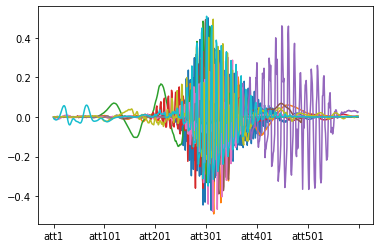

In [20]:
#training set: drop column of the label, to keep only the Insect Sound

df2 = df.drop(['target'], axis=1)

#plot some samples of the first 2 classes
for i in range (0, 5000, 500):
    row = df2.iloc[i]
    row.plot()

#test set: drop column of the label, to keep only the Insect Sound
df2_test = df_test.drop(['target'], axis=1)

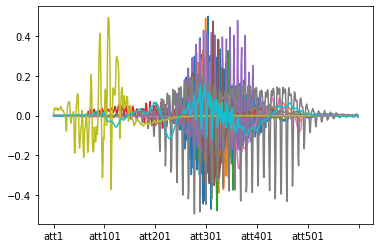

In [72]:
#plot 1 sample of each of the 10 classes
for i in range (0, 25000, 2500):
    row = df2.iloc[i]
    row.plot()


plt.savefig('foo.png')

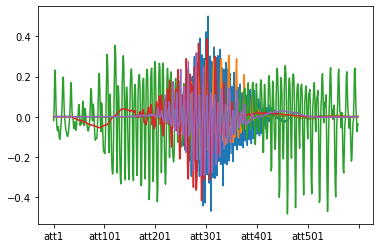

In [73]:
#plot the first 5 samples (all of the same class, class 0)

for i in range (5):
    row = df2.iloc[i]
    row.plot()


plt.savefig('foo5erste.png')

In [3]:
#get the true labels for training and test set
true_labels = df["target"]
true_labels_test = df_test["target"]

In [4]:
#create short version of the training set: This one will have 50 samples, 5 of each class:
#step 1: create empty dataset
dfk = pd.DataFrame(index=np.arange(0), columns=np.arange(0))
#check
dfk

""


In [5]:
#step 2: add every 500th sample to the dataset: the resulting dataset will have 50 samples
for i in range(0, 25000, 500):
    row = df2.iloc[i]
    dfk = dfk.append(row, ignore_index=True)
#check
dfk

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att591,att592,att593,att594,att595,att596,att597,att598,att599,att600
0,1.525796e-04,-6.578439e-05,3.758203e-05,-2.859551e-05,2.020141e-05,-6.050544e-06,3.728420e-06,2.076605e-06,0.000003,-2.861415e-06,...,-1.195282e-06,-0.000003,0.000010,-0.000006,-0.000006,-9.889882e-06,1.120386e-05,-4.337056e-07,0.000013,-0.000024
1,3.850799e-05,2.915045e-04,1.986643e-04,-9.220560e-05,-1.833016e-04,5.236841e-05,3.223468e-04,2.471637e-04,-0.000108,-2.055284e-04,...,3.659886e-05,-0.000322,-0.000133,-0.000169,-0.000357,-1.842442e-04,-3.452433e-04,-2.549129e-04,-0.000386,-0.000353
2,-2.653114e-05,3.612066e-04,2.479794e-04,3.466263e-04,2.986475e-04,3.555311e-04,3.478481e-04,3.779030e-04,0.000384,4.146913e-04,...,-3.643598e-05,-0.000036,-0.000039,-0.000038,-0.000040,-3.674102e-05,-4.267666e-05,-4.774854e-05,-0.000028,-0.000053
3,-6.566654e-05,8.501342e-04,1.852803e-03,-1.243186e-04,-1.357526e-03,-1.001220e-03,-7.327499e-04,4.387830e-04,0.001346,1.065690e-03,...,2.857008e-03,0.002832,0.002834,0.002943,0.003017,3.215098e-03,3.265595e-03,3.582164e-03,0.003475,0.004060
4,-1.405556e-05,4.550075e-06,-1.100017e-05,4.019354e-06,-2.730356e-06,-4.142436e-06,4.399865e-06,-1.185972e-05,0.000006,-9.025495e-06,...,3.097334e-02,0.030157,0.032603,0.031761,0.029660,3.034461e-02,2.727507e-02,2.515101e-02,0.022783,0.025271
5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
6,-1.014370e-03,-3.788051e-03,-6.247533e-03,-8.289193e-03,-9.487492e-03,-1.076598e-02,-1.150304e-02,-1.178106e-02,-0.012048,-1.150713e-02,...,4.786831e-03,0.003368,0.004569,0.004828,0.003497,5.219881e-03,4.540860e-03,4.164240e-03,0.005470,0.004757
7,-2.626590e-03,-4.366702e-03,-3.581773e-03,-2.730378e-03,-8.502899e-04,8.337580e-04,2.197026e-03,2.872735e-03,0.002944,2.229331e-03,...,3.698045e-07,-0.000014,0.000004,-0.000006,-0.000008,-6.173971e-06,4.524097e-06,2.515071e-06,0.000012,-0.000004
8,6.040367e-05,2.652139e-05,8.278381e-05,7.467929e-05,2.081679e-05,9.083913e-05,1.249220e-04,1.389146e-04,0.000328,4.625388e-04,...,-1.686961e-03,-0.002518,-0.003123,-0.001627,0.001106,3.311423e-03,5.804887e-03,7.395149e-03,0.006234,0.003743
9,-5.633918e-03,-1.067705e-02,-1.202744e-02,-1.393877e-02,-1.461434e-02,-1.485291e-02,-1.419869e-02,-1.286982e-02,-0.010908,-8.155201e-03,...,1.657286e-03,0.001704,0.001785,0.001870,0.001882,1.999758e-03,1.951878e-03,2.059108e-03,0.001995,0.002207


In [78]:
#create another short version of the dataset: This one will be larger with 500 samples, 50 of each class:
#step 1: create empty dataset 
dfk2 = pd.DataFrame(index=np.arange(0), columns=np.arange(0))
#step 2: add every 50th sample to the dataset: the resulting dataset will have 500 samples
for i in range(0, 25000, 50):
    row = df2.iloc[i]
    dfk2 = dfk2.append(row, ignore_index=True)
#check
dfk2

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att591,att592,att593,att594,att595,att596,att597,att598,att599,att600
0,0.000153,-6.578439e-05,0.000038,-2.859551e-05,0.000020,-6.050544e-06,0.000004,2.076605e-06,0.000003,-0.000003,...,-0.000001,-0.000003,0.000010,-0.000006,-0.000006,-0.000010,0.000011,-4.337056e-07,0.000013,-0.000024
1,-0.000987,5.901881e-06,0.000023,1.922976e-04,-0.000267,5.396939e-05,0.000161,-1.271661e-04,-0.000081,0.000178,...,0.006828,0.005833,0.005451,0.005132,0.004315,0.003135,0.001764,1.113504e-03,0.000976,0.002307
2,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
3,-0.000007,-4.202484e-05,0.000006,3.717125e-05,-0.000015,-1.063900e-05,0.000004,2.216133e-07,0.000023,-0.000007,...,-0.012840,-0.010771,-0.008558,-0.005975,-0.004048,-0.002536,-0.001490,-1.472575e-03,-0.001225,-0.001358
4,0.000745,1.070356e-03,0.001588,1.043825e-03,0.001406,1.337791e-03,0.001058,1.753306e-03,0.001108,0.001437,...,-0.001518,-0.001759,-0.002137,-0.002008,-0.001507,-0.001178,-0.000738,-6.612484e-04,-0.000636,-0.000517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.000571,-9.190075e-04,-0.000771,-8.520953e-04,-0.000776,-8.088743e-04,-0.000816,-7.587587e-04,-0.000838,-0.000752,...,-0.039507,-0.035245,-0.027976,-0.023232,-0.016705,-0.009219,0.020203,7.090835e-02,0.074583,0.015066
496,0.000287,5.405389e-04,0.000602,6.717375e-04,0.000736,7.397584e-04,0.000748,7.076418e-04,0.000640,0.000571,...,0.006052,0.005858,0.005593,0.005440,0.005156,0.005045,0.004780,4.721063e-03,0.004356,0.004669
497,0.079702,1.171164e-01,0.108183,1.385306e-01,0.154498,1.743780e-01,0.182412,1.848871e-01,0.183094,0.183708,...,0.000703,-0.000741,-0.000451,0.000630,-0.000818,-0.000736,0.000801,-7.304450e-04,-0.000632,0.001115
498,0.000018,-7.115925e-07,0.000002,6.792325e-07,-0.000009,-5.289736e-07,-0.000002,2.674031e-06,-0.000011,0.000003,...,0.000004,0.000006,0.000004,-0.000002,0.000007,0.000003,0.000004,3.823472e-06,-0.000015,0.000012


In [6]:
#create data frame with true labels for dfk2:

#step 1: create data frame with needed number of columns (1) and lines (500) and Nans as entries
dfk2_true_labels = pd.DataFrame(index=np.arange(500), columns=np.arange(1))
#check
dfk2_true_labels

#step 2: replace the Nans with the correct class from the original data set:
j = 0
for i in range(0, 25000, 50):
    row = df['target'].iloc[i]
    print(i, row)
    dfk2_true_labels.iat[j, 0] = row
    j = j+1

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [7]:
#create data frame with true labels for dfk:

#step 1: create data frame with needed number of columns (1) and lines (50) and Nans as entries
dfk_true_labels = pd.DataFrame(index=np.arange(50), columns=np.arange(1))
#check
dfk_true_labels

#step 2: replace the Nans with the correct class from the original data set:
j = 0
for i in range(0, 25000, 500):
    row = df['target'].iloc[i]
    print(i, row)
    dfk_true_labels.iat[j, 0] = row
    j = j+1
    

0 b'Aedes_female'
500 b'Aedes_female'
1000 b'Aedes_female'
1500 b'Aedes_female'
2000 b'Aedes_female'
2500 b'Aedes_male'
3000 b'Aedes_male'
3500 b'Aedes_male'
4000 b'Aedes_male'
4500 b'Aedes_male'
5000 b'Fruit_flies'
5500 b'Fruit_flies'
6000 b'Fruit_flies'
6500 b'Fruit_flies'
7000 b'Fruit_flies'
7500 b'House_flies'
8000 b'House_flies'
8500 b'House_flies'
9000 b'House_flies'
9500 b'House_flies'
10000 b'Quinx_female'
10500 b'Quinx_female'
11000 b'Quinx_female'
11500 b'Quinx_female'
12000 b'Quinx_female'
12500 b'Quinx_male'
13000 b'Quinx_male'
13500 b'Quinx_male'
14000 b'Quinx_male'
14500 b'Quinx_male'
15000 b'Stigma_female'
15500 b'Stigma_female'
16000 b'Stigma_female'
16500 b'Stigma_female'
17000 b'Stigma_female'
17500 b'Stigma_male'
18000 b'Stigma_male'
18500 b'Stigma_male'
19000 b'Stigma_male'
19500 b'Stigma_male'
20000 b'Tarsalis_female'
20500 b'Tarsalis_female'
21000 b'Tarsalis_female'
21500 b'Tarsalis_female'
22000 b'Tarsalis_female'
22500 b'Tarsalis_male'
23000 b'Tarsalis_male'
235

In [8]:
#check
dfk_true_labels

,0
0,b'Aedes_female'
1,b'Aedes_female'
2,b'Aedes_female'
3,b'Aedes_female'
4,b'Aedes_female'
5,b'Aedes_male'
6,b'Aedes_male'
7,b'Aedes_male'
8,b'Aedes_male'
9,b'Aedes_male'


In [4]:
#pick samples from the data set without labels to compare them using Dynamic Time Warping
#sample 3 and 7 fom the same class (class 0):
row1 = df2.iloc[3]
row2 = df2.iloc[7]
#sample 10003 from a different class (class 3):
row3 = df2.iloc[10003]

##Experiment with package dtw

See: https://dynamictimewarping.github.io/python/

In [ ]:
from dtw import *

Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] + 0 * d[i  ,j  ] ,
 ) 

Normalization hint: N



c:\users\ich\appdata\local\programs\python\python37\lib\site-packages\dtw\stepPattern.py:341: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")


<AxesSubplot:xlabel='Query index', ylabel='Reference index'>

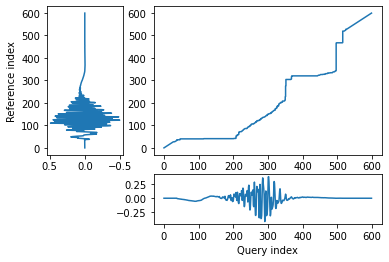

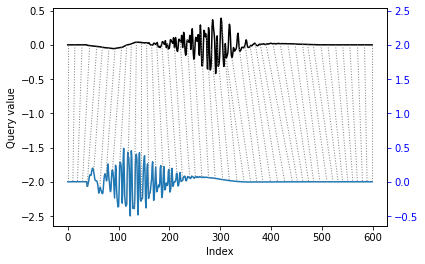

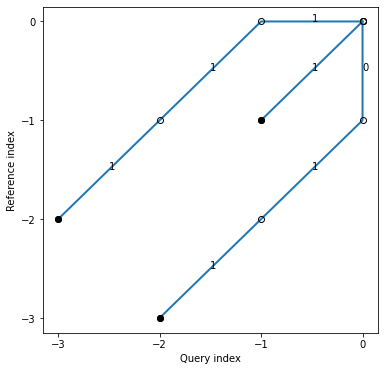

In [5]:
#compare sample 3 and 7:
query = row1
template = row2

alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(query, template, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

## See the recursion relation, as formula and diagram
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()



Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] + 0 * d[i  ,j  ] ,
 ) 

Normalization hint: N



<AxesSubplot:xlabel='Query index', ylabel='Reference index'>

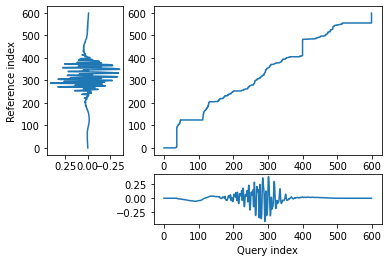

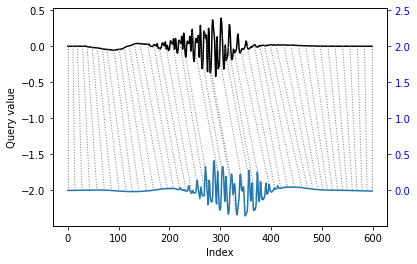

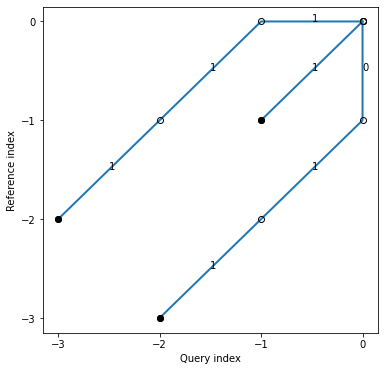

In [6]:
#compare sample 3 and 10003:
template = row3

alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(query, template, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

## See the recursion relation, as formula and diagram
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()

##Result:
The DTW does not seem to align the relevant parts with high amplitudes of samples 3 and 7, probably because they hardly overlap on the time axis.
The alignment of sample 3 and 10003 seems to be better, since start and end of the parts with high amplitudes are aligned.
It is therefore questionable, if the DTW will be able to detect similarities between samples, when the relevant parts of the insect sound happen at different times within the 600 time stamps.

Due to insufficient information about further methods of this package in its documentation, we continued with other packages that also implement DTW.

##Experiment with package tslearn
We applied KMeans clustering to the training data set, using DTW as metric.

In [50]:
import tslearn
from tslearn.clustering import TimeSeriesKMeans


km_dba = TimeSeriesKMeans(n_clusters=10, metric="dtw", max_iter=3, max_iter_barycenter=2, random_state=0).fit(df2)

In [ ]:

#Calculate Adjusted Random Score to compare the two classifications
ari = ari_kmeans = adjusted_rand_score(true_labels, km_dba)

print(ari)

##Result:
The clustering did not finish in over 2 hours. We interrupted it and continued with another package.

##Experiment with package sktime

We applied KMeans clustering to the training set df2, using DTW as metric.
Subsequently, the result should be used to predict the class labels for the test set df2_test.

In [ ]:
from sktime.datasets import load_arrow_head

from sktime.clustering.k_means import TimeSeriesKMeans

In [59]:
#convert training, test and true label data sets to numpy arrays:

np2 = df2.to_numpy()
np2_true_labels = df_true_labels.to_numpy()
np2t =df2_test.to_numpy()
np2t_true_labels = true_labels_test.to_numpy()

X_train, y_train = np2, np2_true_labels

X_test, y_test = np2t, np2t_true_labels

#Cluster training set with KMeans for 10 clusters and DTW as metric:
clusterer = TimeSeriesKMeans(n_clusters=10, metric='dtw')  

clusterer.fit(X_train)  


TypeError: X is not of a supported input data type.X must be of type np.ndarray or pd.DataFrame, found <class 'pandas.core.frame.DataFrame'>Use datatypes.check_is_mtype to check conformance with specifications.

In [ ]:
#Predict classes for test set
y_pred = clusterer.predict(X_test)  

##Result:

The clustering again took too much time (in some attempts over 7 hours), so we had to interrupt it.

We continued with the short versions of the dataset, to achieve shorter calculation times.

In [9]:
#Convert training set dfk to numpy array
np2 = dfk.to_numpy()
np2


array([[ 1.525796e-04, -6.578439e-05,  3.758203e-05, ..., -4.337056e-07,
         1.300974e-05, -2.439660e-05],
       [ 3.850799e-05,  2.915045e-04,  1.986643e-04, ..., -2.549129e-04,
        -3.859337e-04, -3.525200e-04],
       [-2.653114e-05,  3.612066e-04,  2.479794e-04, ..., -4.774854e-05,
        -2.759902e-05, -5.315826e-05],
       ...,
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 4.568406e-06,  5.185733e-06,  5.169087e-06, ..., -1.597996e-05,
         7.880924e-06, -2.303541e-05],
       [ 3.453335e-05, -4.045499e-05,  1.640218e-05, ..., -1.474788e-03,
        -1.343467e-03, -1.476226e-03]])

In [10]:
#Convert true labels of dfk to numpy array:

np_dfk_true_labels = dfk_true_labels.to_numpy()
np_dfk_true_labels

array([[b'Aedes_female'],
       [b'Aedes_female'],
       [b'Aedes_female'],
       [b'Aedes_female'],
       [b'Aedes_female'],
       [b'Aedes_male'],
       [b'Aedes_male'],
       [b'Aedes_male'],
       [b'Aedes_male'],
       [b'Aedes_male'],
       [b'Fruit_flies'],
       [b'Fruit_flies'],
       [b'Fruit_flies'],
       [b'Fruit_flies'],
       [b'Fruit_flies'],
       [b'House_flies'],
       [b'House_flies'],
       [b'House_flies'],
       [b'House_flies'],
       [b'House_flies'],
       [b'Quinx_female'],
       [b'Quinx_female'],
       [b'Quinx_female'],
       [b'Quinx_female'],
       [b'Quinx_female'],
       [b'Quinx_male'],
       [b'Quinx_male'],
       [b'Quinx_male'],
       [b'Quinx_male'],
       [b'Quinx_male'],
       [b'Stigma_female'],
       [b'Stigma_female'],
       [b'Stigma_female'],
       [b'Stigma_female'],
       [b'Stigma_female'],
       [b'Stigma_male'],
       [b'Stigma_male'],
       [b'Stigma_male'],
       [b'Stigma_male'],
       [b'Stigm

To compare the results of KMeans with DTW as metric, we applied it also with Euklidean Distance:

In [11]:
#Cluster training set
X_train, y_train = np2, np_dfk_true_labels

clusterer = TimeSeriesKMeans(n_clusters=10)  

clusterer.fit(X_train)  

TimeSeriesKMeans(n_clusters=10)

In [12]:
#Convert test set and its true labels to numpy arrays
np2_test = df2_test.to_numpy()
np_true_labels_test = true_labels_test.to_numpy()
X_test, y_test = np2_test, np_true_labels_test

In [13]:
#Predict classes for test set:

y_pred = clusterer.predict(X_test)  

In [14]:
#print results
print(y_pred)

[5 5 5 ... 5 5 5]


In [18]:
#save results
np.savetxt('y-pred-001.out', y_pred, delimiter=',')

In [69]:
#calculate Adjusted Random Score
ari = adjusted_rand_score(liste, y_pred)

In [70]:
print(ari)

0.0019871705894891124


Result:
the ARI is very low and thus very bad. The clustering was not able to assign the samples to correct clusters. 
By inspecting the assigned cluster numbers, we found that most of the samples were assigned to the same class.

We subsequently applied KMeans clustering with DTW as metric. Since the calculating time was too long, the maximum number of iterations had to be limited to 10.

In [74]:
#KMeans with DTW as metric and maximum of 10 iterations:
clustererdtw = TimeSeriesKMeans(n_clusters=10, max_iter=10, metric='dtw')  

clustererdtw.fit(X_train)  

TimeSeriesKMeans(max_iter=10, n_clusters=10)

In [75]:
#predict labels for test set:
y_pred = clustererdtw.predict(X_test)

In [76]:
#save results
np.savetxt('y-pred-dtw-001.out', y_pred, delimiter=',')

In [77]:
#calculate ARI
ari = adjusted_rand_score(liste, y_pred)
print(ari)

0.0015329922176228056


Result:
The ARI again is very low.
We suspect, the very low number of samples (5 for each class) causes these bad results.

We retry the experiment with the second short training set dfk2, that has 10 times as many samples as the previous one (50 for each class, 500 altogether).

In [79]:
#convert dfk2 to numpy array
np3 = dfk2.to_numpy()
#KMeans with DTW as metric and maximum of 10 iterations:
clusterer3 = TimeSeriesKMeans(n_clusters=10, max_iter=10, metric='dtw')  

clusterer3.fit(np3)  

TimeSeriesKMeans(max_iter=10, n_clusters=10)

In [80]:
#predict labels for test set:
y_pred = clusterer3.predict(X_test)
#save results:
np.savetxt('y-pred-dtw-003.out', y_pred, delimiter=',')

In [81]:
#calculate ARI
ari = adjusted_rand_score(liste, y_pred)
print(ari)

0.0005947779469754391


Result:
The ARI is even worse than with the shorter training set.

The calculating time with this training set was acceptable, so we retried it with an increased maximum number of iterations of 20 to improve the performance.

In [82]:
#KMeans with DTW as metric and maximum of 20 iterations:

clusterer4 = TimeSeriesKMeans(n_clusters=10, max_iter=20, metric='dtw')  

clusterer4.fit(X_train)

TimeSeriesKMeans(max_iter=20, n_clusters=10)

In [83]:
#predict labels for test set:
y_pred = clusterer4.predict(X_test)

#save results:
np.savetxt('y-pred-dtw-004.out', y_pred, delimiter=',')

In [84]:
#calculate ARI
ari = adjusted_rand_score(liste, y_pred)
print(ari)

0.0005767013372392897


Result:
The ARI became even lower. Increasing the number of iterations did not improve the performance.

##Final results:

Applying KMeans to the reduced training sets took long time, from several minutes to more than 1 hour.
The results were all bad.

Compared to the other learning methods we applied to the Fourier transformed data, the experiments with DTW on the original time series samples could not compete, neither in costs nor in the results.

In all cases, most of the samples were assigned to one cluster. We suspect that the KMeans algorithm created separate clusters for outliers that are very distant to the majority of the samples, no matter from which class. This majority must have become one big cluster, to which most of the test samples were assigned.